# QCTO - Workplace Module

### Project Title: Improving Insurance Claims with Data through Automation
#### Done By: Thabisile Xaba

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** 

This project is aimed at keeping track on the progress of key sustainability indicators, such as access to electricity, education, gender equality, and environmental impacts, while also analyzing their interconnectedness, and develop a predictive model to forecast future trends. This will provide insights that inform policy recommendations aimed at promoting sustainable development and improving living standards globally.

* **Questions we need to answer in order to solve this issue:**
1. Are we making any progress when it comes to the improvement of challenges faced by humanity?
2. If we are, when can we expect them to be met?
3. Which countries are making the fastest progress and which are not?
4. How can we ensure that all countries are moving at the same rate in terms of progress?

* **Background Information:**
For the past few decades, steps have been made in addressing global challenges global challenges such as poverty, inequality, and environmental degradation, which are issues that impact sustainable development. The UN Sustainable Development Goals (SDGs) aim to address these problems, yet progress differs considerably across countries. Key areas of focus include access to electricity, which is crucial for economic growth, and education, which helps reduce poverty. Additionally, balancing economic growth with environmental sustainability is important, which is why this project will analyze these indicators to assess global progress, highlight leading and lagging countries, and suggest strategies for more equitable and sustainable development.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [98]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and handling arrays
import matplotlib.pyplot as plt  # For plotting and data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting the data and cross-validation
from sklearn.preprocessing import StandardScaler  # For scaling the features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating model performance
import re  # For handling and manipulating regular expressions in text
import pickle  # For saving and loading machine learning models
import mlflow  # For tracking and managing machine learning experiments
import mlflow.sklearn  # For logging sklearn models with MLflow
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ephem
import geocoder
from scipy.optimize import curve_fit

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** A ‘global sustainability’ dataset has been put together for the TrueCue Women+Data Hackathon. The dataset tracks the performance of 173 countries against a range of sustainability metrics over a 19-year period.
* **Details:** Taken from https://www.kaggle.com/truecue/worldsustainabilitydataset. Static file download from a range of international organisations such as the UN, the World Bank or Our World in Data. The data dictionary workbook contains the source and URL used for each of the columns. The full dataset was prepared by TrueCue.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [99]:
wsd_df = pd.read_csv('WorldSustainabilityDataset.csv')

This code loads the data from the `WorldSustainabilityDataset.csv` file into a pandas DataFrame named `wsd_df`, which allows you to work with the data easily in Python.

In [100]:
df_copy = wsd_df.copy()

In [101]:
# Display the first few rows to get an overview of the data
# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set width of the display
pd.set_option('display.max_colwidth', None)  # Show full content of each column
wsd_df.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS,Children out of school (% of primary school age) - SE.PRM.UNER.ZS,"Compulsory education, duration (years) - SE.COM.DURS","Cost of business start-up procedures, female (% of GNI per capita) - IC.REG.COST.PC.FE.ZS","Cost of business start-up procedures, male (% of GNI per capita) - IC.REG.COST.PC.MA.ZS",Exports of goods and services (% of GDP) - NE.EXP.GNFS.ZS,Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS,GDP (current US$) - NY.GDP.MKTP.CD,GDP per capita (current US$) - NY.GDP.PCAP.CD,General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS,Gross national expenditure (% of GDP) - NE.DAB.TOTL.ZS,Gross savings (% of GDP) - NY.GNS.ICTR.ZS,Imports of goods and services (% of GDP) - NE.IMP.GNFS.ZS,"Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG","Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS",Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,"Pupil-teacher ratio, primary - SE.PRM.ENRL.TC.ZS",Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS,Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS,"School enrollment, preprimary (% gross) - SE.PRE.ENRR","School enrollment, primary (% gross) - SE.PRM.ENRR","School enrollment, secondary (% gross) - SE.SEC.ENRR",Trade (% of GDP) - NE.TRD.GNFS.ZS,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1,Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1,Proportion of population covered by at least a 2G mobile network (%) - IT_MOB_2GNTWK - 9.c.1,Proportion of population covered by at least a 3G mobile network (%) - IT_MOB_3GNTWK - 9.c.1,Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2","Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Continent,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,NaN,51.834542,1.60268,NaN,NaN,NaN,74.400324,70.792132,1.873453e+09,20617.75047,21.410594,96.288035,23.730274,70.672853,4.044021,97.142860,NaN,19.05967,0.0,0.1753,95.903038,110.788178,96.516167,145.073178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.378,North America,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,NaN,53.552517,0.32258,NaN,NaN,NaN,70.497527,74.338086,1.920112e+09,20670.36701,24.527204,98.050626,19.327902,68.548152,2.883604,94.404068,NaN,18.94779,0.0,0.1805,97.550194,109.440964,97.972870,139.045679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.407,North America,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.00

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [102]:
# Create a dictionary mapping the original column names to simpler ones
simplified_column_names = {
    'Country Name': 'Country',
    'Continent': 'Continent',
    'Year': 'Year',
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS': 'Electricity Access (%)',
    'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG': 'Income Growth (%)',
    'School enrollment, primary (% gross) - SE.PRM.ENRR': 'Primary School Enrollment (%)',
    'School enrollment, secondary (% gross) - SE.SEC.ENRR': 'Secondary School Enrollment (%)',
    'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS': 'Women in Parliament (%)',
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes': 'CO2 Emissions (MT)',
    'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1': 'Poverty Rate (%)',
    'Life expectancy at birth, total (years) - SP.DYN.LE00.IN': 'Life Expectancy (Years)',
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS': 'Renewable Energy (%)'
}

# Rename the columns in the DataFrame
important_df = important_df.rename(columns=simplified_column_names)


In [103]:
# Display the renamed DataFrame
important_df.head()

,Country,Continent,Year,Electricity Access (%),Income Growth (%),Primary School Enrollment (%),Secondary School Enrollment (%),Women in Parliament (%),CO2 Emissions (MT),Life Expectancy (Years),Renewable Energy (%)
0,Aruba,North America,2000,91.660398,2.499857,110.788178,96.516167,17.976712,2.378,70.160098,0.1753
1,Aruba,North America,2001,100.000000,2.499857,109.440964,97.972870,17.976712,2.407,73.853000,0.1805
2,Aruba,North America,2002,100.000000,2.499857,111.010834,100.520683,17.976712,2.437,73.937000,0.1814
3,Aruba,North America,2003,100.000000,2.499857,109.214302,99.091171,17.976712,2.561,74.038000,0.1846
4,Aruba,North America,2004,100.000000,2.499857,110.839050,97.252441,17.976712,2.616,74.156000,0.1871


In [104]:
important_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          3287 non-null   object 
 1   Continent                        3287 non-null   object 
 2   Year                             3287 non-null   int64  
 3   Electricity Access (%)           3287 non-null   float64
 4   Income Growth (%)                3287 non-null   float64
 5   Primary School Enrollment (%)    3287 non-null   float64
 6   Secondary School Enrollment (%)  3287 non-null   float64
 7   Women in Parliament (%)          3287 non-null   float64
 8   CO2 Emissions (MT)               3287 non-null   float64
 9   Life Expectancy (Years)          3287 non-null   float64
 10  Renewable Energy (%)             3287 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 282.6+ KB


In [105]:
print(important_df.describe())

              Year  Electricity Access (%)  Income Growth (%)  Primary School Enrollment (%)  Secondary School Enrollment (%)  Women in Parliament (%)  CO2 Emissions (MT)  Life Expectancy (Years)  Renewable Energy (%)
count  3287.000000             3287.000000        3287.000000                    3287.000000                      3287.000000              3287.000000         3287.000000              3287.000000           3287.000000
mean   2009.000000               79.300662           2.499857                     103.491620                        81.126732                17.976712          174.646907                70.160098             32.672923
std       5.478059               29.960797          16.568093                      11.895697                        24.953486                10.760291          757.422589                 8.934086             29.921274
min    2000.000000                1.270180        -645.655290                      32.356060                         6.197350   

In [106]:
# Drop columns that are mostly missing
important_df.dropna(axis=1, thresh=int(0.5 * len(important_df)), inplace=True)  # Drop columns with more than 50% missing values

In [107]:
print(important_df.isnull().sum())

Country                            0
Continent                          0
Year                               0
Electricity Access (%)             0
Income Growth (%)                  0
Primary School Enrollment (%)      0
Secondary School Enrollment (%)    0
Women in Parliament (%)            0
CO2 Emissions (MT)                 0
Life Expectancy (Years)            0
Renewable Energy (%)               0
dtype: int64


In [108]:
# Fill NaN values only in numeric columns with the mean of those columns
important_df.fillna(important_df.select_dtypes(include='number').mean(), inplace=True)

# Display the DataFrame to verify the changes
print(important_df.head())


  Country      Continent  Year  Electricity Access (%)  Income Growth (%)  Primary School Enrollment (%)  Secondary School Enrollment (%)  Women in Parliament (%)  CO2 Emissions (MT)  Life Expectancy (Years)  Renewable Energy (%)
0   Aruba  North America  2000               91.660398           2.499857                     110.788178                        96.516167                17.976712               2.378                70.160098                0.1753
1   Aruba  North America  2001              100.000000           2.499857                     109.440964                        97.972870                17.976712               2.407                73.853000                0.1805
2   Aruba  North America  2002              100.000000           2.499857                     111.010834                       100.520683                17.976712               2.437                73.937000                0.1814
3   Aruba  North America  2003              100.000000           2.499857       

In [109]:
print(important_df.isnull().sum())

Country                            0
Continent                          0
Year                               0
Electricity Access (%)             0
Income Growth (%)                  0
Primary School Enrollment (%)      0
Secondary School Enrollment (%)    0
Women in Parliament (%)            0
CO2 Emissions (MT)                 0
Life Expectancy (Years)            0
Renewable Energy (%)               0
dtype: int64


In [110]:
# Find rows where the 'Continent' column has NaN values
missing_continent_rows = important_df[important_df['Continent'].isna()]

# Display the 'Country' and 'Continent' columns for those rows
print(missing_continent_rows[['Country', 'Continent']])


Empty DataFrame
Columns: [Country, Continent]
Index: []


In [111]:
# Replace NaN in the 'Continent' column for Timor-Leste with 'Asia'
important_df.loc[important_df['Country'] == 'Timor-Leste', 'Continent'] = 'Asia'

# Verify the change
print(important_df[important_df['Country'] == 'Timor-Leste'])

          Country Continent  Year  Electricity Access (%)  Income Growth (%)  Primary School Enrollment (%)  Secondary School Enrollment (%)  Women in Parliament (%)  CO2 Emissions (MT)  Life Expectancy (Years)  Renewable Energy (%)
2945  Timor-Leste      Asia  2000               79.300662           2.499857                     103.491620                        81.126732                17.976712          174.646907                70.160098              0.000000
2946  Timor-Leste      Asia  2001               25.600000          15.268206                     120.610153                        37.881290                17.976712          174.646907                70.160098              0.000000
2947  Timor-Leste      Asia  2002               23.925289          11.968659                     116.053551                        43.808250                26.136364            0.161000                60.901000             48.252701
2948  Timor-Leste      Asia  2003               27.700000         -1

In [112]:
important_df.drop_duplicates(inplace=True)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


#### **Trends Analysis**

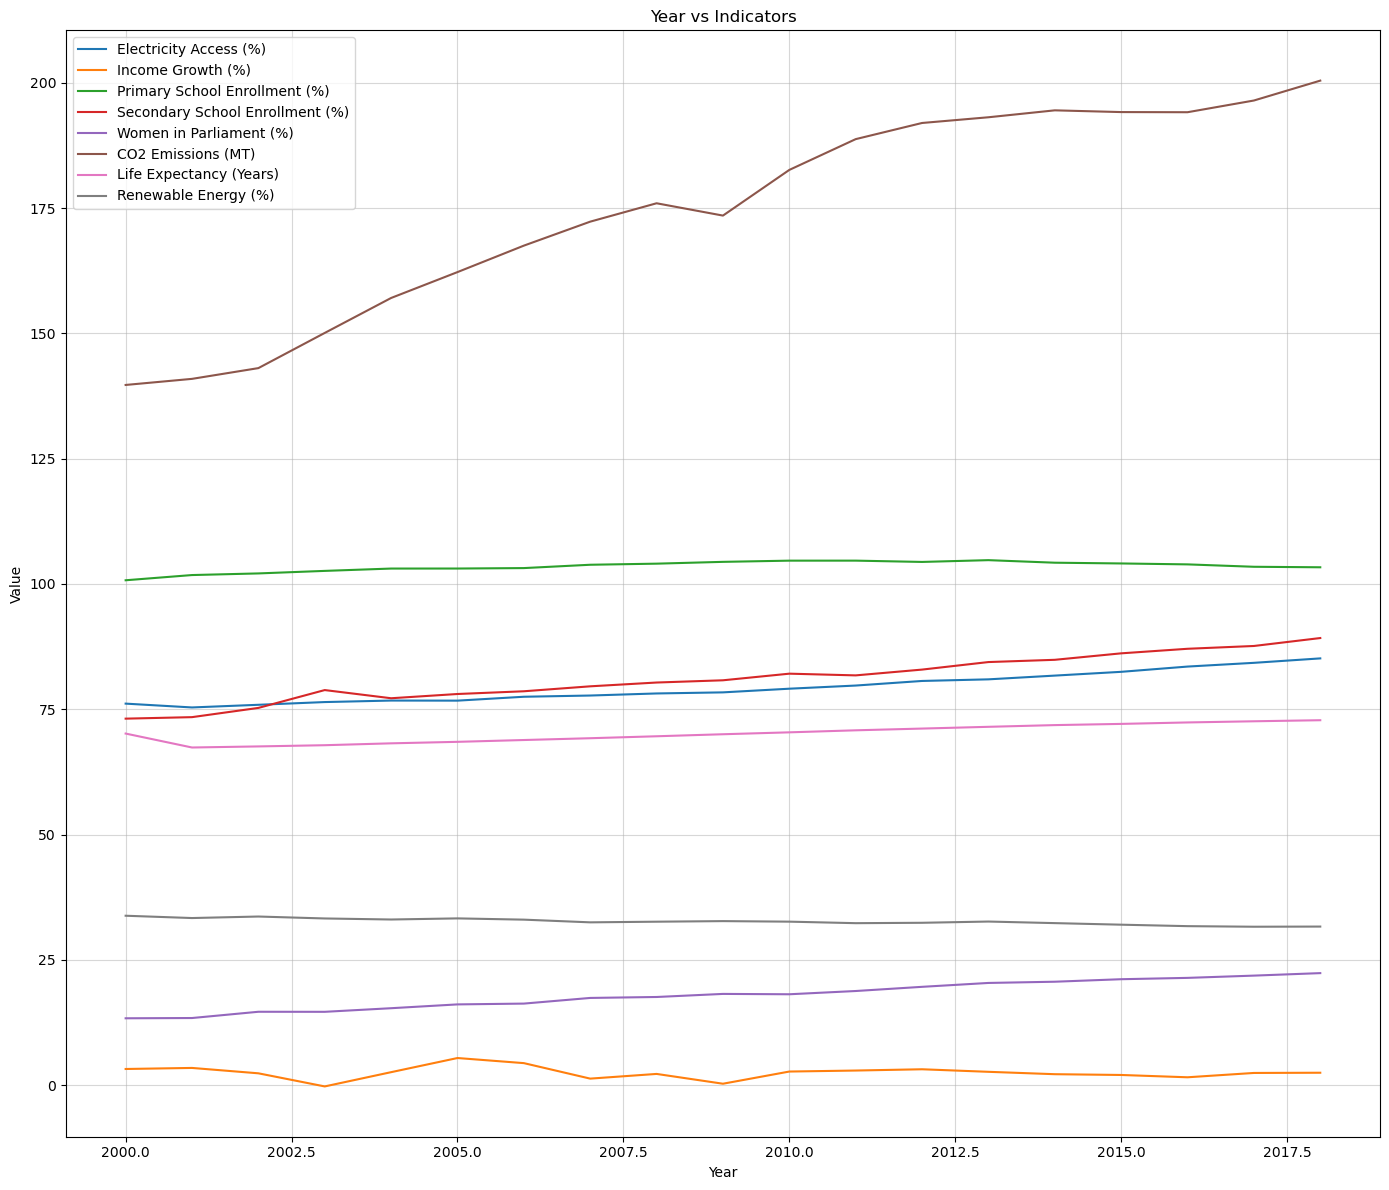

In [113]:
# Aggregating data by year
aggregated_data = important_df.groupby('Year').agg({
    'Electricity Access (%)': 'mean',
    'Income Growth (%)': 'mean',
    'Primary School Enrollment (%)': 'mean',
    'Secondary School Enrollment (%)': 'mean',
    'Women in Parliament (%)': 'mean',
    'CO2 Emissions (MT)': 'mean',
    'Life Expectancy (Years)': 'mean',
    'Renewable Energy (%)': 'mean'
}).reset_index()
import matplotlib.pyplot as plt

# Define features to plot
features = [
    'Electricity Access (%)', 
    'Income Growth (%)', 
    'Primary School Enrollment (%)', 
    'Secondary School Enrollment (%)', 
    'Women in Parliament (%)', 
    'CO2 Emissions (MT)', 
    'Life Expectancy (Years)', 
    'Renewable Energy (%)'
]

plt.figure(figsize=(14, 12))

# Plot each feature
for feature in features:
    plt.plot(aggregated_data['Year'], aggregated_data[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Year vs Indicators')
plt.legend(loc='best')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig('Visuals/Year_vs_Indicators.png')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [66]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [67]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [68]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [69]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [70]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
